   
<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: auto; margin: 10px;">
  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width=100px width=auto style="padding:10px; vertical-align: center;">

</div>
   
<div   style:"text-align: center; background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  ));width: 400px; height: 30px; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Course: Data Science </h1>

</div>
    <div   style:"border: 3px solid green;text-align: center; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">CA6-Introduction to Data Science</h1>
        <h1 style="font-family: Georgia; color: black; text-align: center; ">Team memebers:</h1>

</div>

<div>    
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Shahzad Momayez- 810100272 </h1>
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Mohammad Amanlou- 810100084 </h1>
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Amir Mahdi Farzaneh- 810100194 </h1>

</div>
   </html>

# Introduction
In this phase, we aim to analyze our dataset further and get a deeper understanding, so that
it can help us in the next phase. Analyzing the variables and their relationship would probably
help you a lot in achieving the insight you’ll need.

# what is EDA?
Exploratory Data Analysis (EDA) is a crucial step in the data analysis process where analysts use various techniques to understand and summarize the main characteristics of a dataset. EDA involves both graphical and quantitative methods to identify patterns, detect anomalies, test hypotheses, and check assumptions.$

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hotels_in_europe.xls').drop(columns= ["Unnamed: 0.1" , "Unnamed: 0"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   598 non-null    object 
 1   location               598 non-null    object 
 2   price                  598 non-null    object 
 3   rating                 598 non-null    float64
 4   quality                598 non-null    object 
 5   review                 598 non-null    object 
 6   bed                    598 non-null    object 
 7   distance from centure  598 non-null    float64
 8   room_type              598 non-null    object 
 9   nights                 598 non-null    object 
 10  adults                 598 non-null    object 
 11  city                   598 non-null    object 
 12  neighbourhood          598 non-null    object 
 13  quality_val            598 non-null    float64
 14  nights2                598 non-null    int64  
 15  adults

In [4]:
df.describe()

,rating,distance from centure,quality_val,nights2,adults2,review2,price2,bed2,dfc
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,8.319064,5.562375,2.270067,1.469900,1.511706,4831.324415,305.235786,1.221572,5.562375
std,0.548765,37.525590,0.748074,0.499511,0.500281,5276.075702,263.041015,0.701859,37.525590
min,4.900000,0.100000,1.000000,1.000000,1.000000,5.000000,20.000000,1.000000,0.100000
25%,8.100000,0.600000,2.000000,1.000000,1.000000,1229.000000,124.000000,1.000000,0.600000
50%,8.400000,1.500000,2.000000,1.000000,2.000000,2918.000000,217.000000,1.000000,1.500000
75%,8.700000,2.500000,3.000000,2.000000,2.000000,6924.500000,444.500000,1.000000,2.500000
max,9.600000,450.000000,4.000000,2.000000,2.000000,28926.000000,2777.000000,6.000000,450.000000


# preprocess

--------------------------------------------------------------------------------------------------------

.The given code snippet is a part of a data manipulation process using the Pandas library in Python. It focuses on extracting specific components from a string column in a DataFrame and creating new columns based on these components. this "location" coulumn containd 2 different information about the neighborhood and the city. so we replace "location" with 2 different columns:
1) neighborhood 
2) city

In [5]:
df['city'] = df['location'].str.split().str[-1]

In [6]:
df['neighbourhood'] = df['location'].str.split(',').str[0]

In [7]:
unique_values = df['quality'].unique()
print(unique_values)

['Fabulous' 'Very good' 'Good' 'Superb' 'Exceptional' 'Guest rating'
 'Review score']


In [8]:
sorted_df = df.sort_values(by='rating', ascending=True)

In [9]:
mapping = {'Review score' : 0, "Guest rating" : 0 ,'Good' : 1, 'Very good' : 2,'Fabulous' : 3, 'Superb' : 4 , 'Exceptional' : 5}
df['quality_val'] = df['quality'].map(mapping)

In [10]:
df['nights2'] = pd.to_numeric(df['nights'].str.split().str[0])
df['adults2'] = pd.to_numeric(df['adults'].str.split().str[0])

In [11]:
# df['bed2'] = pd.to_numeric(df['bed'].str.split().str[0])
df['review'] = df['review'].str.replace(',', '')
df['price'] = df['price'].str.replace(',', '')
df['review2'] = pd.to_numeric(df['review'].str.split().str[0])
df['price2'] = pd.to_numeric(df['price'].str.split("$").str[1])

In [12]:
df['bed2'] = pd.to_numeric(df['bed'].str.split().str[0], errors='coerce')

In [13]:
df['rating'] = pd.to_numeric(df['rating'])

In [14]:
df['dfc'] = pd.to_numeric(df['distance from centure'])

In [15]:
numerical_df = df.select_dtypes(include=[int, float])

In [16]:
def fill_nan(main_df):
    try:
      main_df_without_null = main_df.drop("size", axis=1)
      main_df_without_null = main_df_without_null.drop("free_canelation", axis=1)
    except:
      main_df_without_null = main_df

    main_df_without_null['bed2'].fillna(main_df_without_null['bed2'].median(), inplace=True)
    main_df_without_null['quality_val'].fillna(main_df_without_null['quality_val'].median(), inplace=True)
    main_df_without_null.head()
    main_df_without_null.isna().sum()
    return main_df_without_null

In [17]:
df = fill_nan(df)

In [18]:
df.isna().sum()

name                     0
location                 0
price                    0
rating                   0
quality                  0
review                   0
bed                      0
distance from centure    0
room_type                0
nights                   0
adults                   0
city                     0
neighbourhood            0
quality_val              0
nights2                  0
adults2                  0
review2                  0
price2                   0
bed2                     0
dfc                      0
dtype: int64

# Visualization

In [19]:
df.drop(columns = ["location" , "price" , "nights" , "adults" , "review" , "bed" , 'distance from centure' ,  ] , inplace = True)

In [20]:
df.columns = df.columns.str.replace('2$', '')
numerical_df = df.select_dtypes(include=[int, float])

C:\Users\a\AppData\Local\Temp\ipykernel_12040\3147147941.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('2$', '')


In [21]:
df.describe()

,rating,quality_val,nights,adults,review,price,bed,dfc
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,8.319064,2.225753,1.469900,1.511706,4831.324415,305.235786,1.153846,5.562375
std,0.548765,0.862899,0.499511,0.500281,5276.075702,263.041015,0.641718,37.525590
min,4.900000,0.000000,1.000000,1.000000,5.000000,20.000000,1.000000,0.100000
25%,8.100000,2.000000,1.000000,1.000000,1229.000000,124.000000,1.000000,0.600000
50%,8.400000,2.000000,1.000000,2.000000,2918.000000,217.000000,1.000000,1.500000
75%,8.700000,3.000000,2.000000,2.000000,6924.500000,444.500000,1.000000,2.500000
max,9.600000,5.000000,2.000000,2.000000,28926.000000,2777.000000,6.000000,450.000000


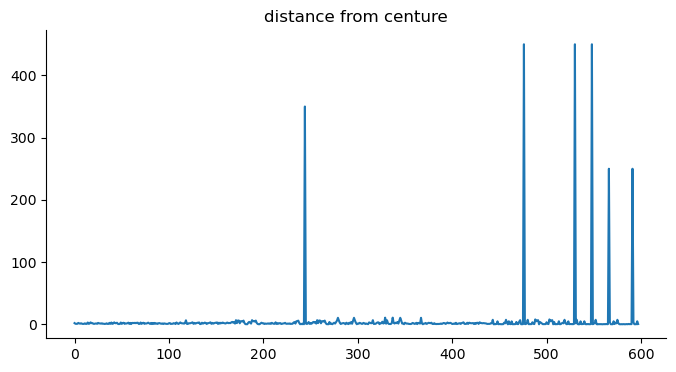

In [22]:
# @title distance from centure

numerical_df['dfc'].plot(kind='line', figsize=(8, 4), title='distance from centure')
plt.gca().spines[['top', 'right']].set_visible(False)

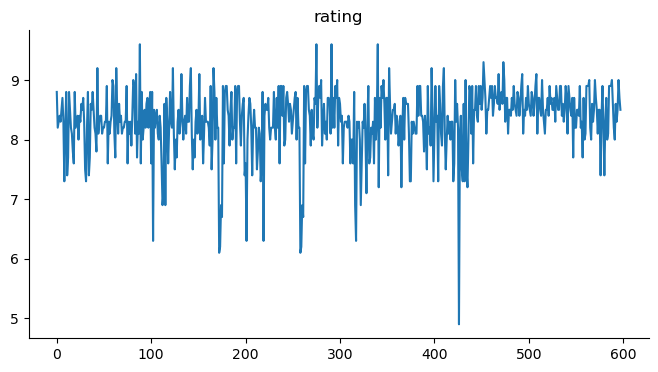

In [23]:
# @title rating

numerical_df['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

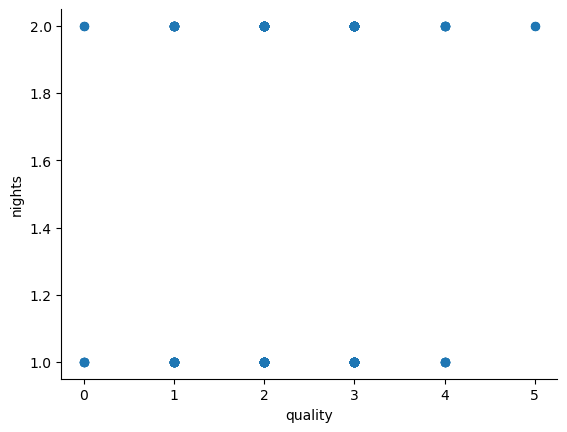

In [24]:
# @title quality_val vs nights2

numerical_df.plot(kind='scatter', x='quality_val', y='nights', s=32, alpha=.8)
plt.ylabel("nights")
plt.xlabel("quality")
plt.gca().spines[['top', 'right',]].set_visible(False)

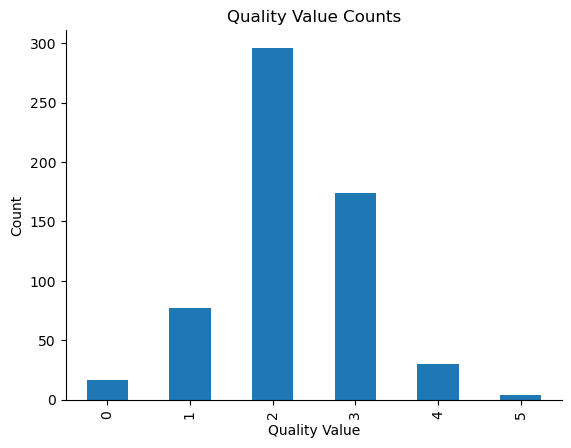

In [25]:
# Calculate count of each unique value in 'quality_val' column
quality_val_counts = numerical_df['quality_val'].value_counts()

# Sort the quality_val_counts DataFrame by index (unique values of 'quality_val')
quality_val_counts = quality_val_counts.sort_index()
quality_val_counts.plot(kind='bar', title='Quality Value Counts')
plt.xlabel('Quality Value')
plt.ylabel('Count')
plt.gca().spines[['top', 'right']].set_visible(False)

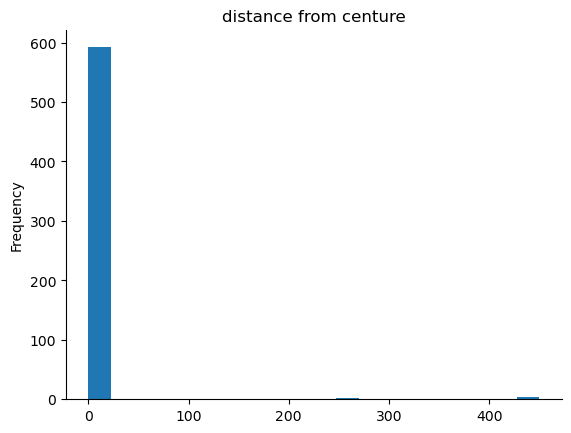

In [26]:
# @title distance from centure

df['dfc'].plot(kind='hist', bins=20, title='distance from centure')
plt.gca().spines[['top', 'right',]].set_visible(False)

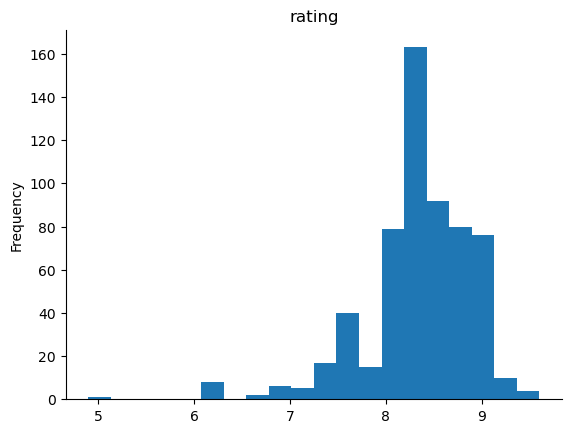

In [27]:
# @title rating

df['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [28]:
correlation_matrix = numerical_df.corr()

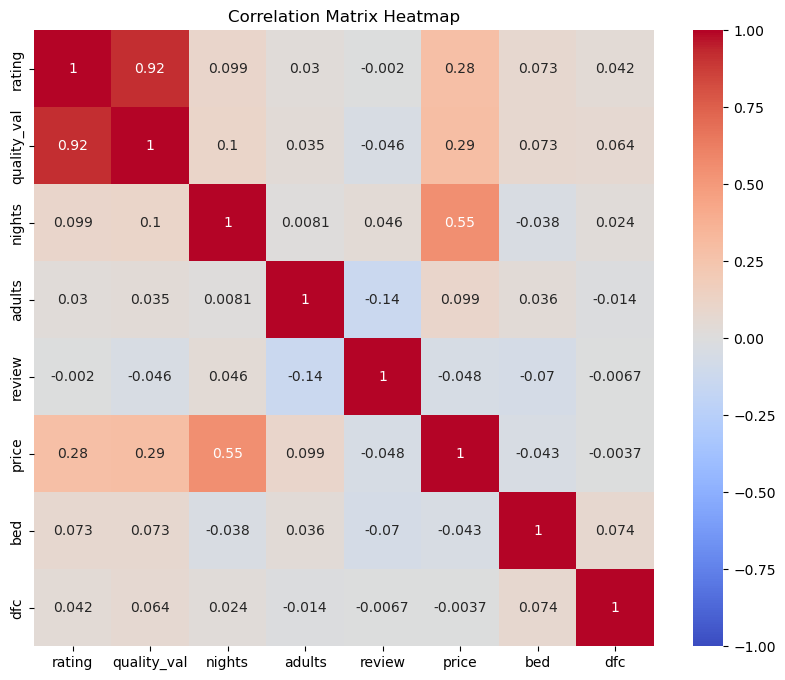

In [29]:
# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add title and labels
plt.title('Correlation Matrix Heatmap')
plt.show()


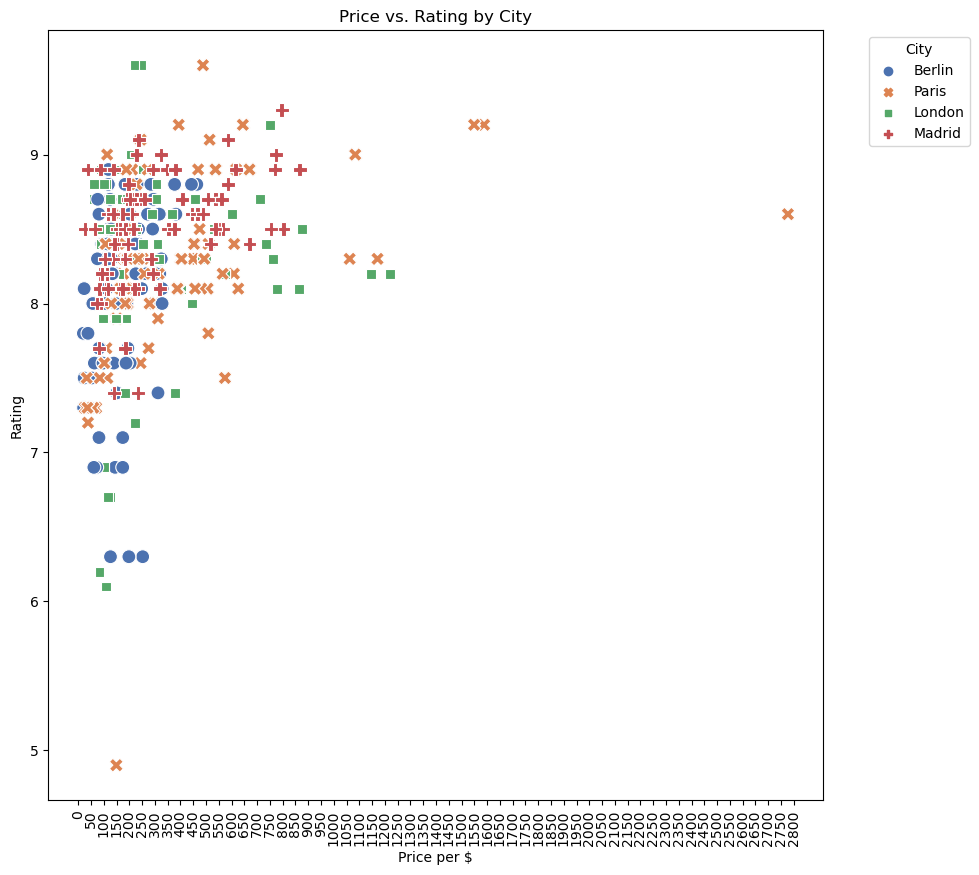

In [30]:
def city_rating_price(df):
    plt.figure(figsize=(10, 10))
    scatter_plot = sns.scatterplot(data=df, x='price', y='rating', hue='city', style='city', palette='deep', s=100)

    # Add title and labels
    plt.title('Price vs. Rating by City')
    plt.xlabel('Price per $')
    plt.ylabel('Rating')
    plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(range(0, df['price'].max() + 50, 50))
    plt.xticks(rotation=90)
    # Show plot
    plt.show()
city_rating_price(df)

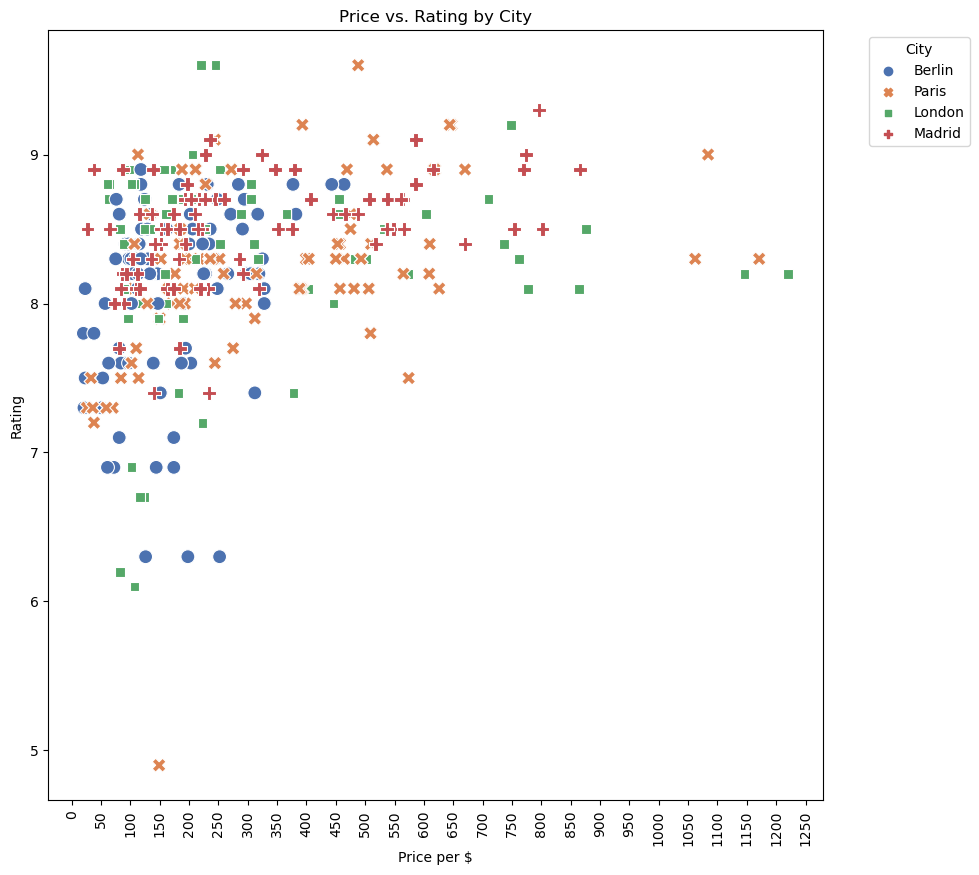

In [31]:
city_rating_price(df[df['price'] < 1350])

In [32]:
cities_walth = (df[df['price'] < 1350]).sort_values(by = ['price'], ascending=False)
(cities_walth.loc[:, ['city', 'price']]).groupby(['city']).mean().sort_values(by = ['price'], ascending=False)

,price
city,
Paris,353.616883
Madrid,336.301282
London,306.217391
Berlin,177.061644


In [33]:
cities_walth.head(5)

,name,rating,quality,room_type,city,neighbourhood,quality_val,nights,adults,review,price,bed,dfc
294,Sheraton Grand London Park Lane,8.2,Very good,Deluxe King Room,London,Westminster Borough,2,2,2,999,1220,1.0,0.9
52,Hotel du Collectionneur,8.3,Very good,Deluxe King Room,Paris,8th arr.,2,2,2,3506,1171,1.0,2.5
73,Hotel du Collectionneur,8.3,Very good,Deluxe King Room,Paris,8th arr.,2,2,2,3506,1171,1.0,2.5
343,JW Marriott Grosvenor House London,8.2,Very good,"Deluxe Room, Guest room, 1 Queen",London,Westminster Borough,2,2,1,1229,1146,1.0,1.2
292,JW Marriott Grosvenor House London,8.2,Very good,"Deluxe Room, Guest room, 1 Queen",London,Westminster Borough,2,2,2,1229,1146,1.0,1.2


In [34]:
london_df = df[df['city'] == 'London']
paris_df = df[df['city'] == 'Paris']
madrid_df = df[df['city'] == 'Madrid']
berlin_df = df[df['city'] == 'Berlin']

In [35]:
def neighbourhood_price_rating(df):
    plt.figure(figsize=(8, 8))
    scatter_plot = sns.scatterplot(data=df, x='price', y='rating', hue='neighbourhood', style='neighbourhood', palette='deep', s=100)

    # Add title and labels
    plt.title('Price vs. Rating By Neighbourhood')
    plt.xlabel('Price per $')
    plt.ylabel('Rating')
    plt.legend(title='Neighbour', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(range(0, df['price'].max() + 60, 60))
    plt.xticks(rotation=90)
    # Show plot
    plt.show()

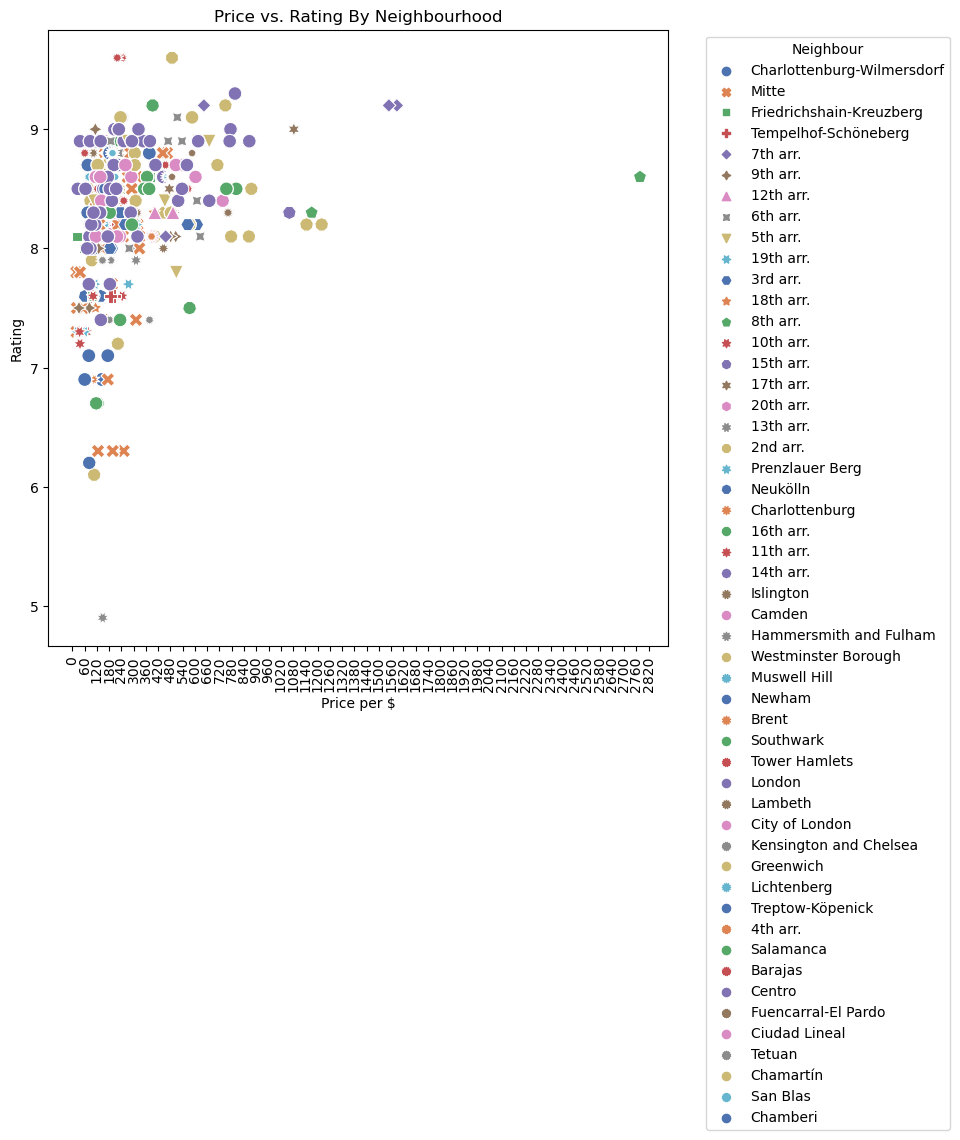

In [36]:
neighbourhood_price_rating(df)

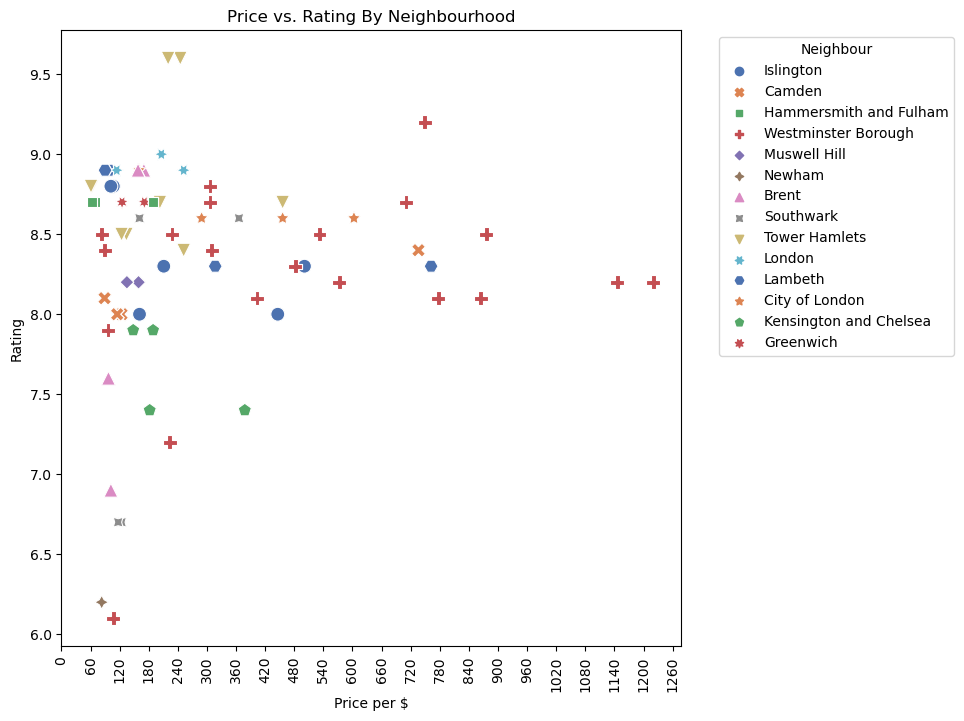

In [37]:
neighbourhood_price_rating(london_df)

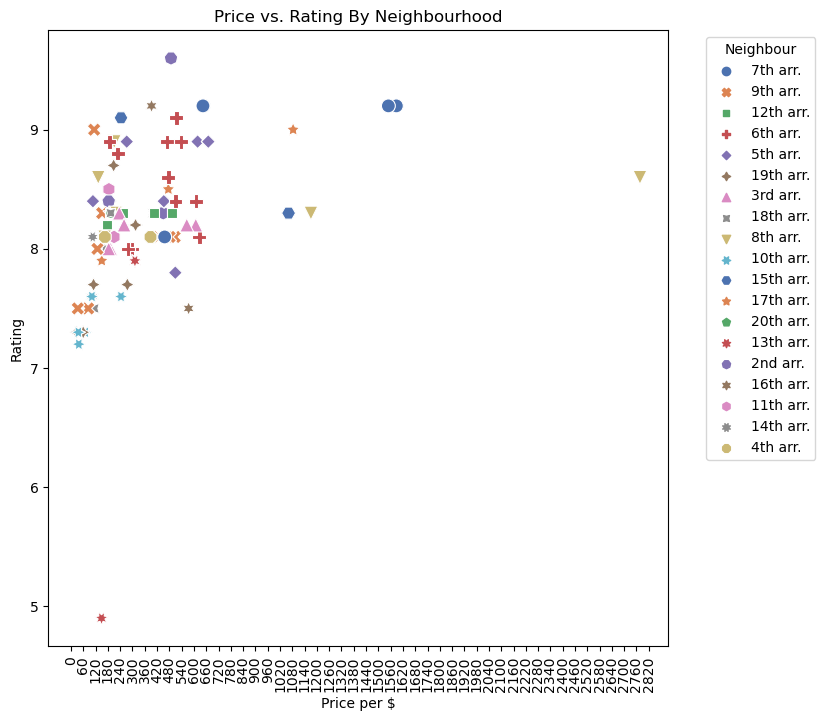

In [38]:
neighbourhood_price_rating(paris_df)

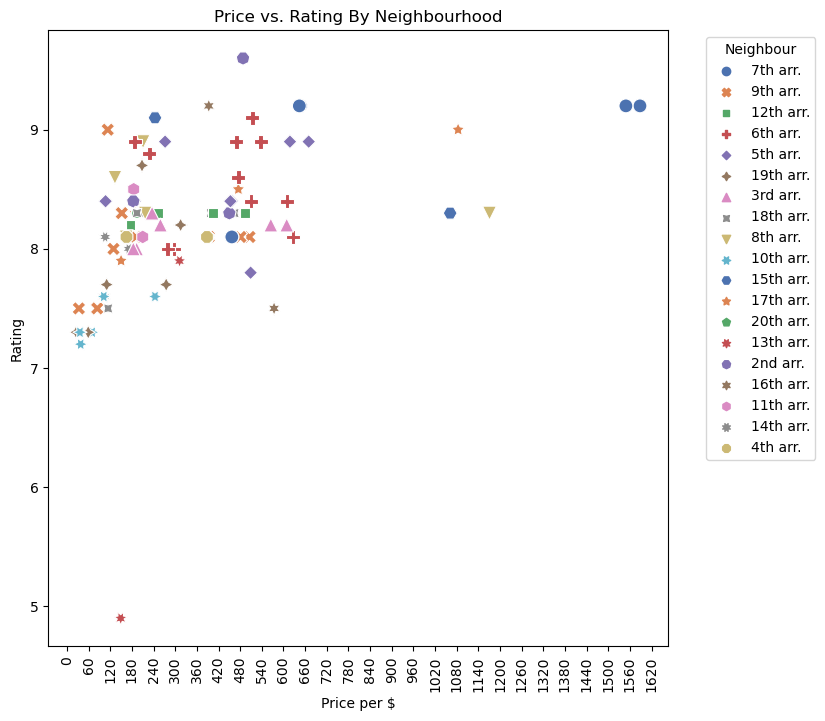

In [41]:
neighbourhood_price_rating(paris_df[paris_df['price'] < 1800])

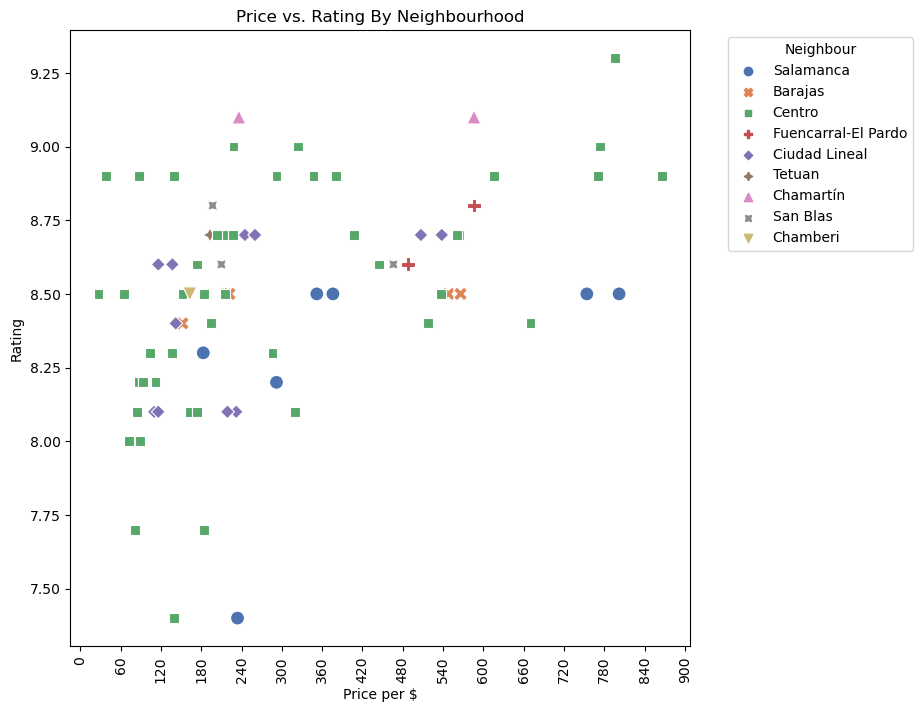

In [42]:
neighbourhood_price_rating(madrid_df)

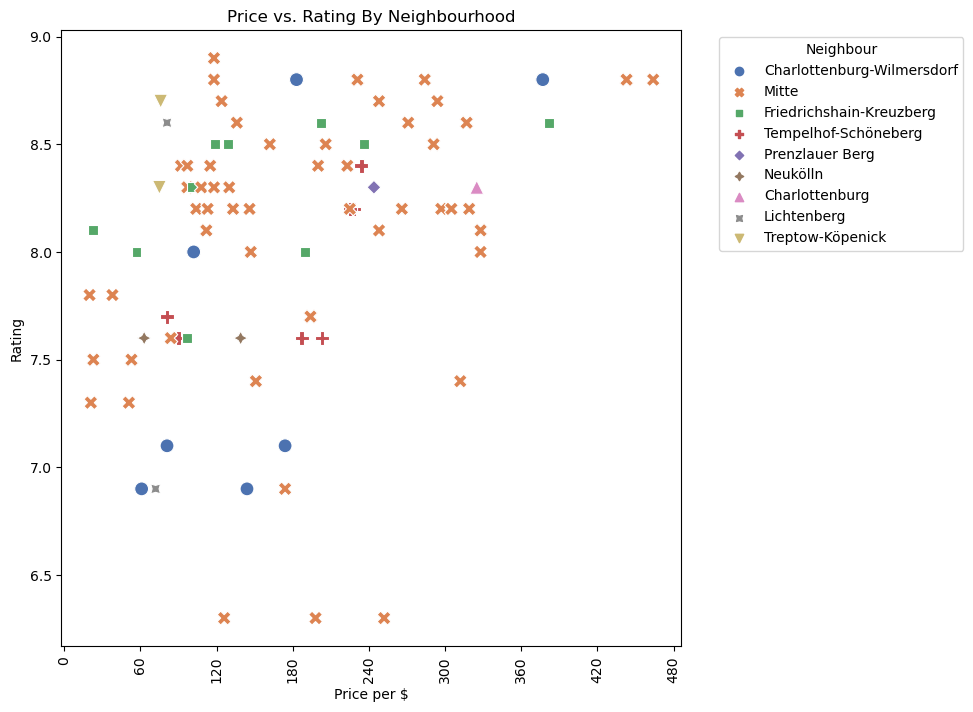

In [43]:
neighbourhood_price_rating(berlin_df)

In [ ]:
main_df = df

Text(0, 0.5, 'Number of Rows')

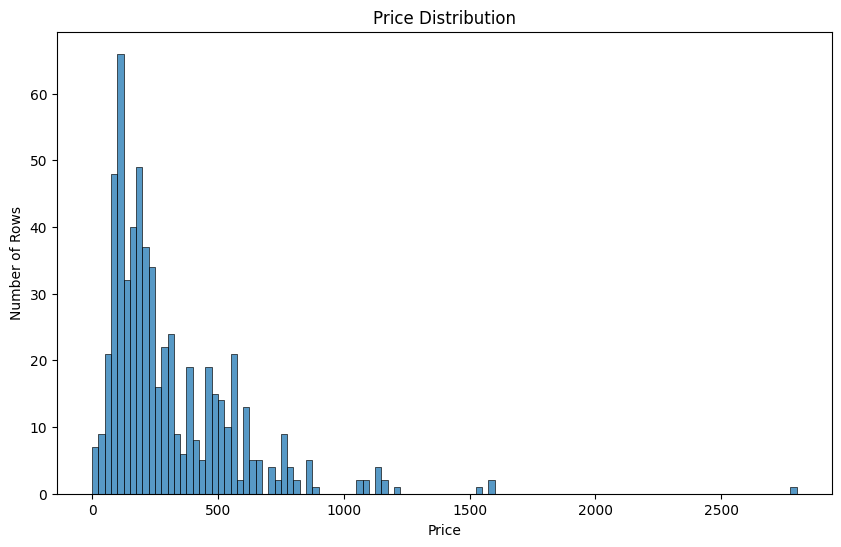

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(main_df['price2'], bins=range(0, max(main_df['price2']) + 25, 25))
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Rows')

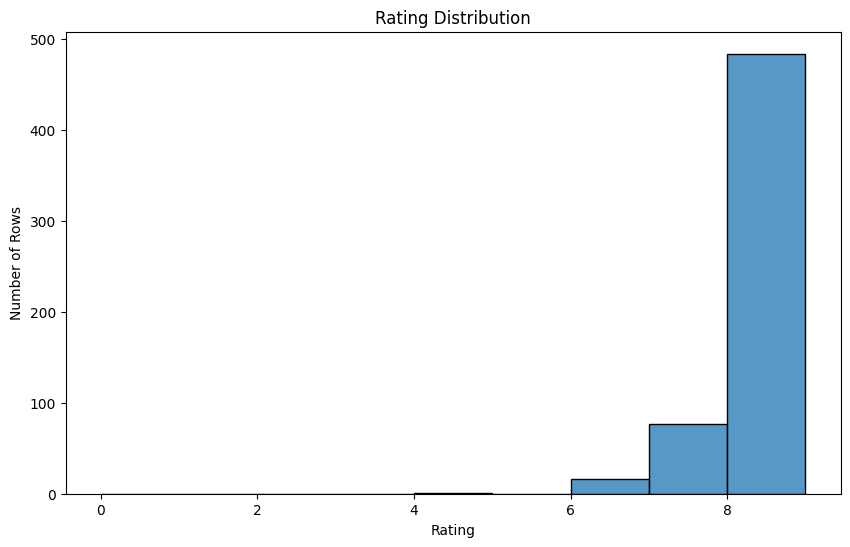

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(main_df['rating'], bins=range(0, 10))
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Rows')

plt.show()

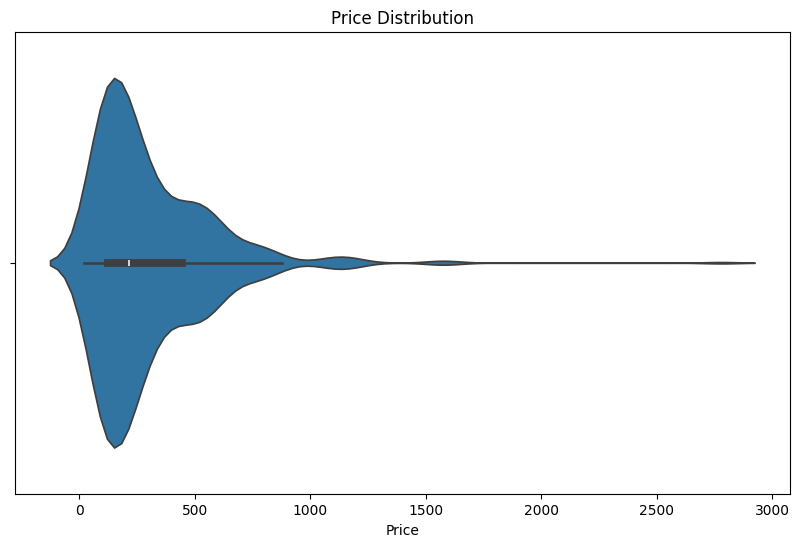

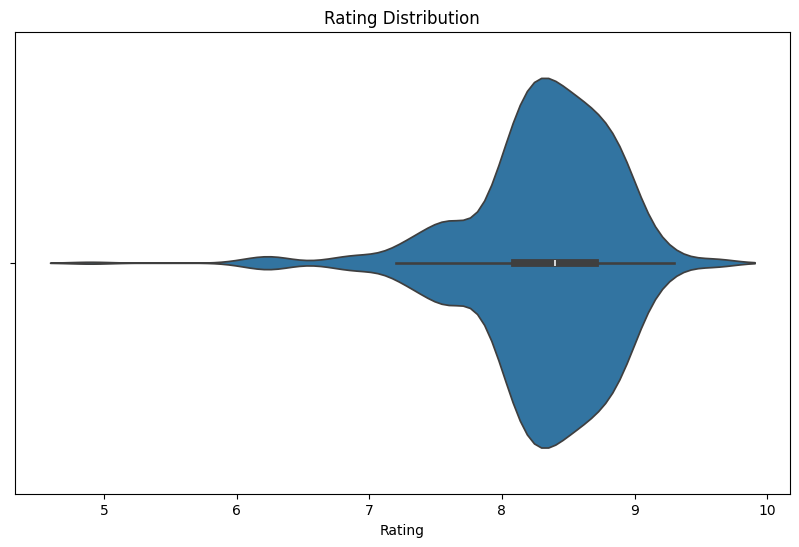

In [ ]:
# Create a violin plot for price
plt.figure(figsize=(10, 6))
sns.violinplot(data=main_df, x='price2')
plt.title('Price Distribution')
plt.xlabel('Price')

plt.show()

# Create a violin plot for rating
plt.figure(figsize=(10, 6))
sns.violinplot(data=main_df, x='rating')
plt.title('Rating Distribution')
plt.xlabel('Rating')

plt.show()

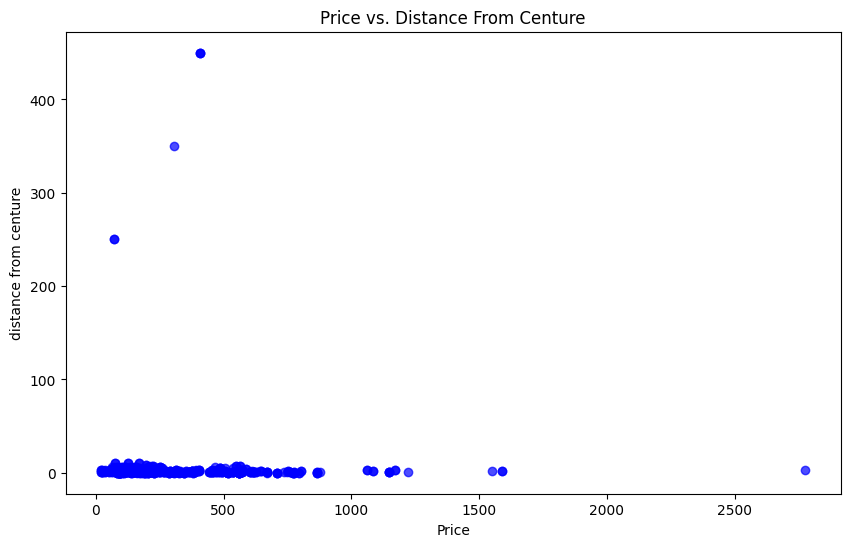

In [ ]:
distance_from_centure_less_than_50 = main_df[main_df['dfc']<50]
plt.figure(figsize=(10, 6))
plt.scatter(main_df['price2'], main_df['dfc'], color='blue', alpha=0.7)
plt.title('Price vs. Distance From Centure')
plt.xlabel('Price')
plt.ylabel('distance from centure')

plt.show()


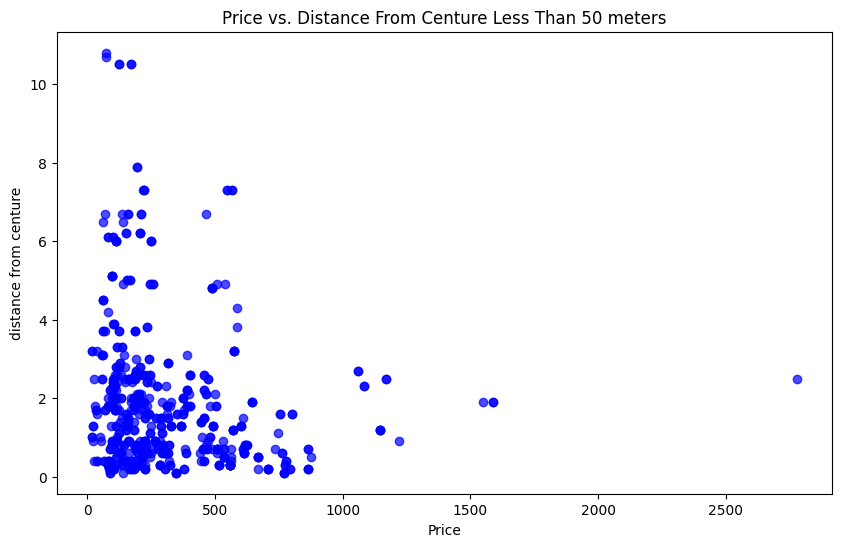

In [ ]:
distance_from_centure_less_than_50 = main_df[main_df['dfc']<50]
plt.figure(figsize=(10, 6))
plt.scatter(distance_from_centure_less_than_50['price2'], distance_from_centure_less_than_50['dfc'], color='blue', alpha=0.7)
plt.title('Price vs. Distance From Centure Less Than 50 meters')
plt.xlabel('Price')
plt.ylabel('distance from centure')

plt.show()


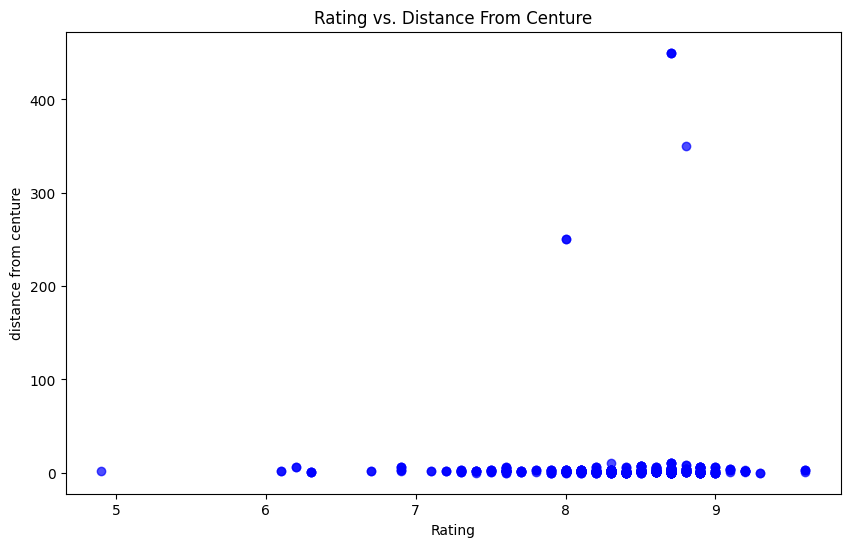

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(main_df['rating'], main_df['dfc'], color='blue', alpha=0.7)
plt.title('Rating vs. Distance From Centure')
plt.xlabel('Rating')
plt.ylabel('distance from centure')

plt.show()


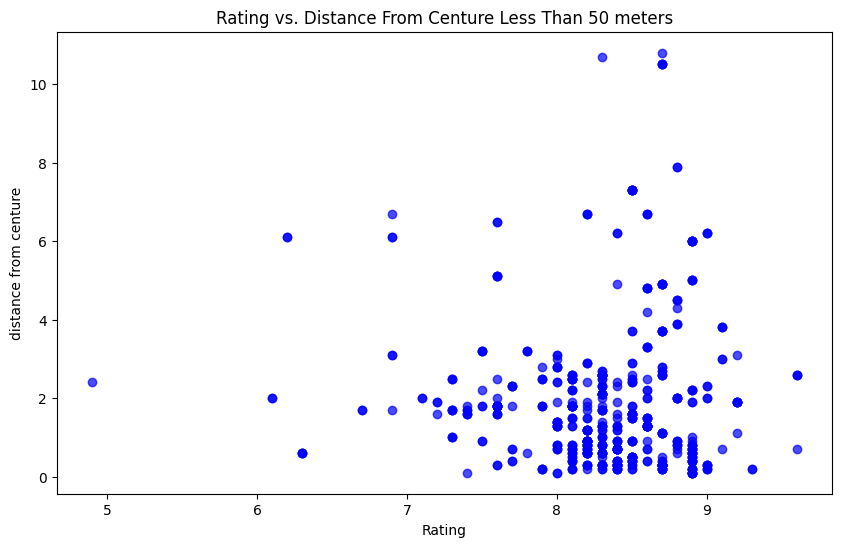

In [ ]:
# distance_from_centure_less_than_50 = main_df[main_df['dfc']<50]
plt.figure(figsize=(10, 6))
plt.scatter(distance_from_centure_less_than_50['rating'], distance_from_centure_less_than_50['dfc'], color='blue', alpha=0.7)
plt.title('Rating vs. Distance From Centure Less Than 50 meters')
plt.xlabel('Rating')
plt.ylabel('distance from centure')

plt.show()


In [ ]:
main_df

,name,location,price,rating,quality,review,bed,distance from centure,room_type,nights,adults,city,neighbourhood,quality_val,nights2,adults2,review2,price2,bed2,dfc
0,DoubleTree by Hilton Berlin Ku'damm,"Charlottenburg-Wilmersdorf, Berlin",US$183,8.8,Fabulous,1209 reviews,1 extra-large double bed,2.0,King Room,1 night,1 adult,Berlin,Charlottenburg-Wilmersdorf,3,1,1,1209,183,1.0,2.0
1,Hotel AMANO Grand Central,"Mitte, Berlin",US$104,8.2,Very good,10745 reviews,1 large double bed,0.9,Standard Double or Twin Room,1 night,1 adult,Berlin,Mitte,2,1,1,10745,104,1.0,0.9
2,Hotel ROMY by AMANO,"Mitte, Berlin",US$97,8.3,Very good,5619 reviews,1 large double bed,0.8,Small Double Room,1 night,1 adult,Berlin,Mitte,2,1,1,5619,97,1.0,0.8
3,Hotel 38,"Mitte, Berlin",US$97,8.4,Very good,4502 reviews,1 single bed,0.9,Single Room,1 night,1 adult,Berlin,Mitte,2,1,1,4502,97,1.0,0.9
4,AMANO East Side,"Friedrichshain-Kreuzberg, Berlin",US$101,8.3,Very good,6989 reviews,1 large double bed,2.3,Standard Double Room,1 night,1 adult,Berlin,Friedrichshain-Kreuzberg,2,1,1,6989,101,1.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,Jc Rooms Jardines,"Centro, Madrid",US$104,8.3,Very good,4463 reviews,Beds: 1 double or 2 singles,0.2,Deluxe Double or Twin Room,1 night,2 adults,Madrid,Centro,2,1,2,4463,104,1.0,0.2
594,Suite Prado,"Centro, Madrid",US$184,8.5,Very good,1120 reviews,Multiple bed types,0.2,One-Bedroom Apartment,1 night,2 adults,Madrid,Centro,2,1,2,1120,184,1.0,0.2
595,Catalonia Puerta del Sol,"Centro, Madrid",US$228,9.0,Superb,2595 reviews,Beds: 1 double or 2 singles,0.2,Double or Twin Room,1 night,2 adults,Madrid,Centro,4,1,2,2595,228,1.0,0.2
596,Hotel Pinar Plaza,"Ciudad Lineal, Madrid",US$260,8.7,Fabulous,423 reviews,1 large double bed,4.9,Standard Double Room,1 night,2 adults,Madrid,Ciudad Lineal,3,1,2,423,260,1.0,4.9


In [ ]:
main_df['room_type'].unique()

array(['King Room', 'Standard Double or Twin Room', 'Small Double Room',
       'Single Room', 'Standard Double Room',
       'Superior Double or Twin Room', 'Room with King Size bed',
       'Bed in 8-Bed Dormitory Room', 'Comfort Room', 'Double Room',
       'Twin Room', 'King Studio with Sofa Bed',
       'Queen Room - Mobility Access',
       'Bed in 8-Bed Mixed Dormitory Room with Private Bathroom',
       'Bed in 6-Bed Mixed Dormitory Room', 'Cosy Small Room',
       'Queen Room',
       'Bed 8-Bed Mixed Dormitory Room with Private Bathroom',
       'Deluxe Room', 'Small Single Room', 'Superior Double Room',
       'Comfort Double Room', 'Classic Double Room', 'Classic Room',
       '"Cosy" Room', 'Deluxe King Room',
       'Classic King Room - Garden Side',
       'Executive – Passion Sensorial Shower', 'Queen Bed Double Room',
       'Classic double room', 'Deluxe Queen Studio',
       'Art Deco Queen, Guest room, 1 Queen', 'Studio',
       'One-Bedroom Apartment', 'Deluxe Apar

C:\Users\User\AppData\Local\Temp\ipykernel_19052\2945381888.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=main_df, x='bed2', y='review2', palette='viridis')


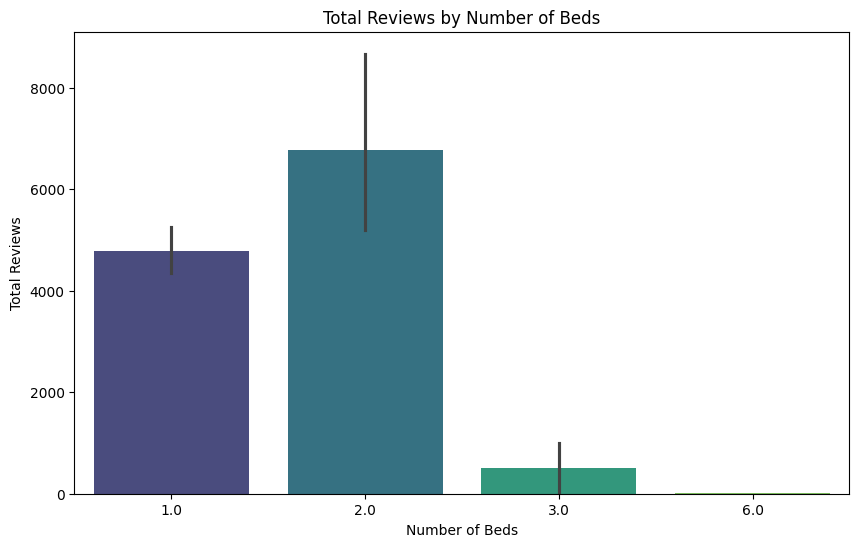

In [ ]:
# aggregated_df = main_df.groupby('beds2').agg({'reviews': 'sum'}).reset_index()

# Create a bar plot for reviews and number of beds
plt.figure(figsize=(10, 6))
sns.barplot(data=main_df, x='bed2', y='review2', palette='viridis')
plt.title('Total Reviews by Number of Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Total Reviews')

plt.show()